# ***Importing necassary libraries***

In [ ]:
import numpy as np
import pandas as pd

#Library is used for ploting MRI scans
import matplotlib.pyplot as plt

#opencv library for resizing images
import cv2

#os library for loading necessary folders and directories
import os
import shutil
import imutils
import itertools
import PIL

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelBinarizer

from tqdm import tqdm

import keras
import tensorflow as tf

from tensorflow.keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
from keras import layers
from keras.models import Model, Sequential


import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential

from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D,Input
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from zipfile import ZipFile

# used to save the state of a random function, so that it can generate same random numbers during multiple iterations
random_seed = 123

<ipython-input-1-032caebd6712>:37: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook as tqdm


### ***Using 'files' modules for uploading dataset***
### optional

### ***Mounting the google drive***

In [ ]:
from google.colab import drive

drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


### ***DataSet that was uploaded in google drive was in zip format. With 'ZipFile' module unzipping the zip file***

In [ ]:
# ctniyn.zip
file_name = "/content/drive/MyDrive/archive.zip"
with ZipFile(file_name,'r') as zipFile:

  # extracting archive.zip in neuroblastoma folder

  zipFile.extractall("/content/drive/MyDrive/neuroblastoma")
  print('Done')

FileNotFoundError: ignored

# ***Now inside Neuroblastoma Folder Create following folders in following sequence :***


1.   ***Train***

> *   Yes
*   No

2.   ***Test***

> *   Yes
*   No

3.   ***Val***

> *   Yes
*   No

!mkdir is function that is used to create new folder in google drive


In [ ]:
!mkdir /content/drive/MyDrive/neuroblastoma/train
!mkdir /content/drive/MyDrive/neuroblastoma/test
!mkdir /content/drive/MyDrive/neuroblastoma/val
!mkdir /content/drive/MyDrive/neuroblastoma/train/YES
!mkdir /content/drive/MyDrive/neuroblastoma/train/NO
!mkdir /content/drive/MyDrive/neuroblastoma/test/YES
!mkdir /content/drive/MyDrive/neuroblastoma/test/NO
!mkdir /content/drive/MyDrive/neuroblastoma/val/YES
!mkdir /content/drive/MyDrive/neuroblastoma/val/NO

mkdir: cannot create directory ‘/content/drive/MyDrive/neuroblastoma/train’: File exists
mkdir: cannot create directory ‘/content/drive/MyDrive/neuroblastoma/test’: File exists
mkdir: cannot create directory ‘/content/drive/MyDrive/neuroblastoma/val’: File exists
mkdir: cannot create directory ‘/content/drive/MyDrive/neuroblastoma/train/YES’: File exists
mkdir: cannot create directory ‘/content/drive/MyDrive/neuroblastoma/train/NO’: File exists
mkdir: cannot create directory ‘/content/drive/MyDrive/neuroblastoma/test/YES’: File exists
mkdir: cannot create directory ‘/content/drive/MyDrive/neuroblastoma/test/NO’: File exists
mkdir: cannot create directory ‘/content/drive/MyDrive/neuroblastoma/val/YES’: File exists
mkdir: cannot create directory ‘/content/drive/MyDrive/neuroblastoma/val/NO’: File exists


### ***Shutil library is used to copy image files in sub-directores (train,validation)***

80% of the images will be copied in train folder having 2 sub-directories (yes/no)

20% of the images will be copied in validation folder having 2 sub-directories (yes/no)

**shutil function requires 2 parameters. image_path, new_copied_path**

**os.listdir** outputs the name of images in the folder

**len** variable count the number of output images

complete_new_path  = root_folder (neuroblastoma) + class_name (yes/no) + file_name

shuttle.copy(first_paramter = image_name, new_path = complete_new_path)

In [ ]:
#img_path = '/content/Neuroblastoma_Dataset'
img_path = '/content/drive/MyDrive/neuroblastoma/Neuroblastoma_Dataset/'
#datayı train test val olarak bölme

root_path = "/content/drive/MyDrive/neuroblastoma/"
for CLASS in os.listdir(img_path):

  # CLASS is either YES or NO

  # class name should be yes or no NOT .yes or .no

  if not CLASS.startswith('.'):
    img_num = len(os.listdir(img_path + '/' + CLASS))
    for (n, filename) in enumerate(os.listdir(img_path + '/' + CLASS)):
      img = img_path + '/' + CLASS + '/' + filename
      if n < 5:
        shutil.copy(img, root_path + 'test/' + CLASS.upper() + '/' + filename)
      elif n < 0.8*img_num:
        shutil.copy(img, root_path +  'train/' + CLASS.upper() + '/' + filename)
      else:
        shutil.copy(img, root_path +  'val/' + CLASS.upper() + '/' + filename)

### ***Creating Function to Load Each image***

In [ ]:
def load_data(dir_path, img_size=(100,100)):
  X=[]
  y=[]
  i=0
  labels=dict()
  for path in tqdm(sorted(os.listdir(dir_path))):
    if not path.startswith('.'):
      labels[i] = path # path will either be YES or NO that is going to be label
      for file in os.listdir(dir_path + path):
        if not file.startswith('.'):
          img = cv2.imread(dir_path + path + '/' + file)
          X.append(img)
          y.append(i)
      i += 1
  X = np.array(X)
  y = np.array(y)
  print(f'{len(X)} images loaded from {dir_path} directory.')
  return X, y, labels

### ***Now using load_data function to load training and validation dataset***

X = images_set
Y = label (yes/no) (yes = 1 / no = 0)

using tqdm to display the progress bar

In [ ]:
root_path = "/content/drive/MyDrive/neuroblastoma/"

"""train_dir = '/content/train/'
test_dir = '/content/test/'
val_dir = '/content/val/'"""

train_dir = root_path + 'train/'
test_dir = root_path + 'test/'
val_dir = root_path + 'val/'

img_size = (224, 224)

x_train, y_train, labels = load_data(train_dir, img_size)
x_test, y_test, _ = load_data(test_dir, img_size)
x_val, y_val, _ = load_data(val_dir, img_size)


  0%|          | 0/2 [00:00<?, ?it/s]

844 images loaded from /content/drive/MyDrive/neuroblastoma/train/ directory.


<ipython-input-7-89d2516fc246>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array(X)


  0%|          | 0/2 [00:00<?, ?it/s]

10 images loaded from /content/drive/MyDrive/neuroblastoma/test/ directory.


  0%|          | 0/2 [00:00<?, ?it/s]

213 images loaded from /content/drive/MyDrive/neuroblastoma/val/ directory.


### ***Creating the function called plot_samples***

### ***np.argwhere*** function is used to find the indices of array elements that are non-zero, grouped by element.


In [ ]:
def plot_samples(X, y, labels_dict, n=50):
  for index in range(len(labels_dict)):
    print(labels_dict)
    imgs=X[np.argwhere(y == index)][:n]
    j = 10
    i = int(n/j)

    plt.figure(figsize=(15,6))
    c = 1

    for img in imgs:
      plt.subplot(i,j,c)
      plt.imshow(img[0])

      plt.xticks([])
      plt.yticks([])

      c+=1
    plt.suptitle('Tumor: {}'.format(labels_dict[index]))
    plt.show()

In [ ]:
plot_samples(x_train, y_train, labels, 30)

NameError: ignored

### ***Creating function called crop_images to crop tumor image from center***

### Applying certain preprocessing tasks


1.   Converting RGB image to grayscale
2.   Applying gaussing blur to smoothen image
3.   Applying thresholding to convery grayscale image into binary image (0,1)
4.   applying certain morphological operations  (dialation and erosion)
5.   Calculating contours (edges)
6.   Now next task is to calculate the largest contour. That is outer most contour of CT of Neuroblastoma (brain boundary).
7.   Using this Maximum outer contour. The CT of Neuroblastoma is cropped.
8.   'c' is the maximum outer contour. Now from this 'c' contour array 4 coordinates are extracted i.e (top-left, top-right, bottom-left, bottom-right). Now using these 4 coordinates the CT of Neuroblastoma is cropped and returned. TO provide margin certain pixel values are added as parameter in 'crop_images' function.












In [ ]:
def crop_images(set_name, add_pixels_value=0):
  set_new=[]
  for img in set_name:
    gray= cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray = cv2.GaussianBlur(gray, (5,5), 0)

    thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2) #erozyon
    thresh = cv2.dilate(thresh, None, iterations=2) #küçük gürültü bölgelerini ortadan kaldırmak için genişlemeler

    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)

    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])

    add_pixels = add_pixels_value
    new_img = img[extTop[1] - add_pixels:extBot[1]+add_pixels, extLeft[0]-add_pixels:extRight[0]+add_pixels].copy()
    set_new.append(new_img)
  return np.array(set_new)

### ***Now this 'crop_images' function is applied to training and validation set. test_set is optional.***

In [ ]:
x_train_crop = crop_images(set_name=x_train)
x_val_crop = crop_images(set_name=x_val)
x_test_crop = crop_images(set_name=x_test)

<ipython-input-11-bf2093374e68>:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(set_new)


### ***Plotting training crop images***

{0: 'NO', 1: 'YES'}


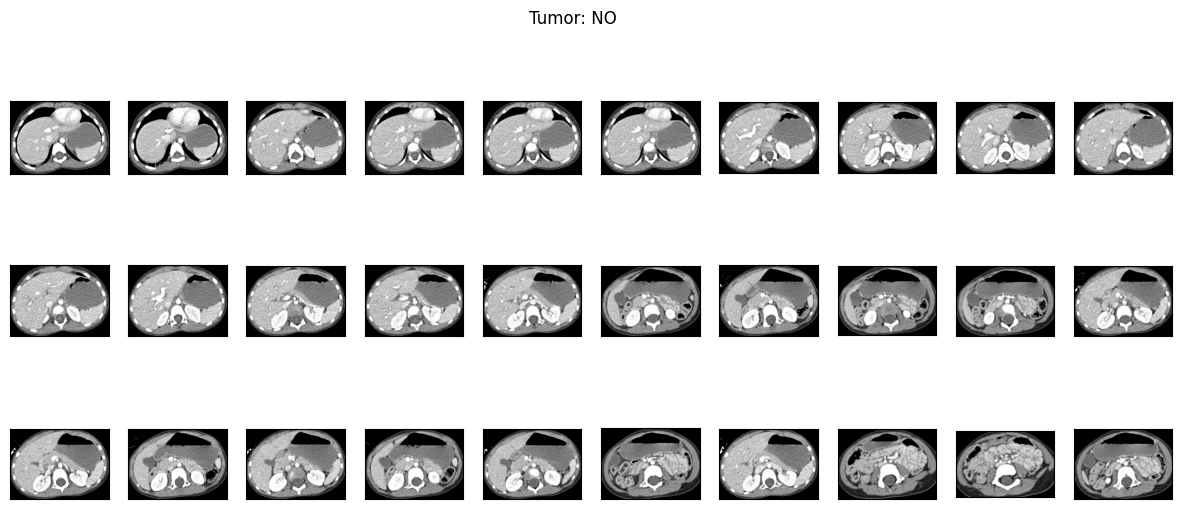

{0: 'NO', 1: 'YES'}


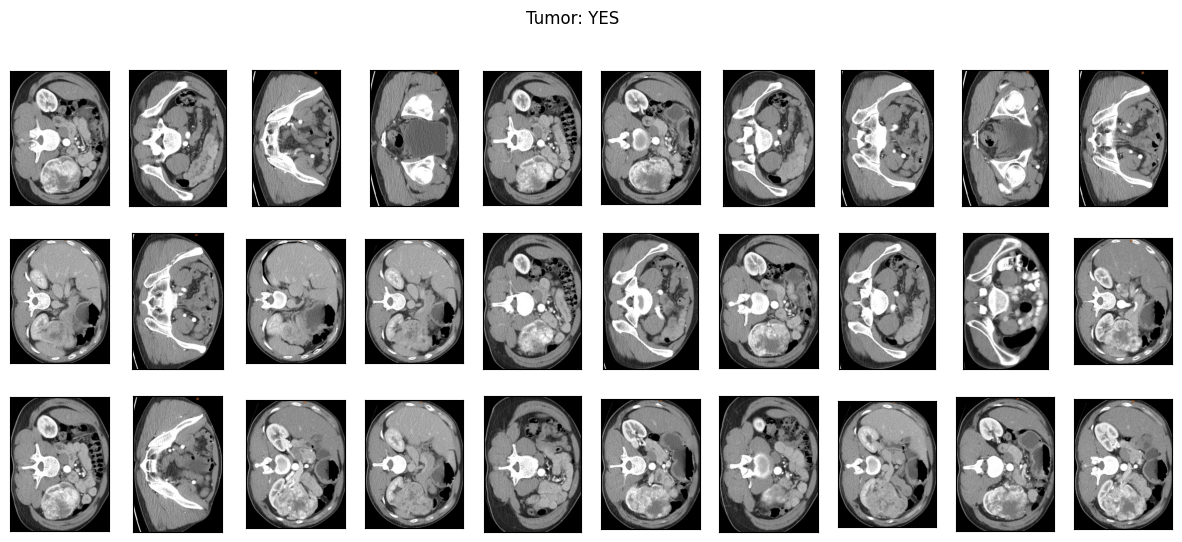

In [ ]:
plot_samples(x_train_crop, y_train, labels, 30)

### ***Plotting validation crop images***

{0: 'NO', 1: 'YES'}


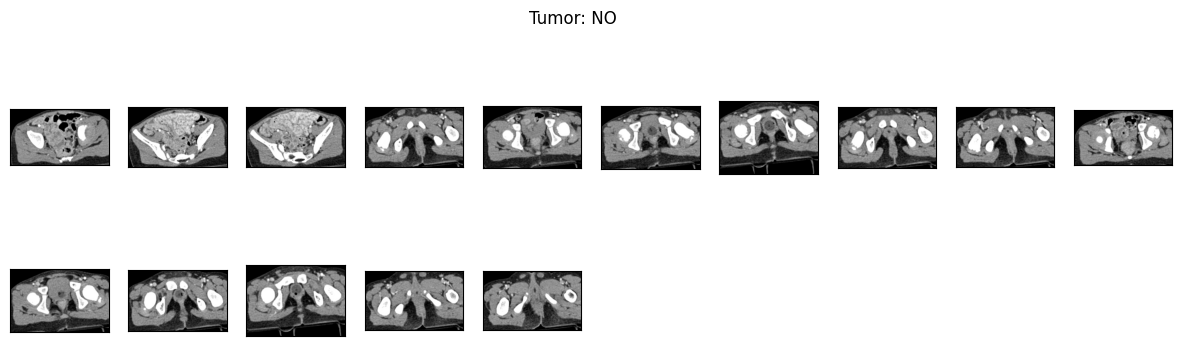

{0: 'NO', 1: 'YES'}


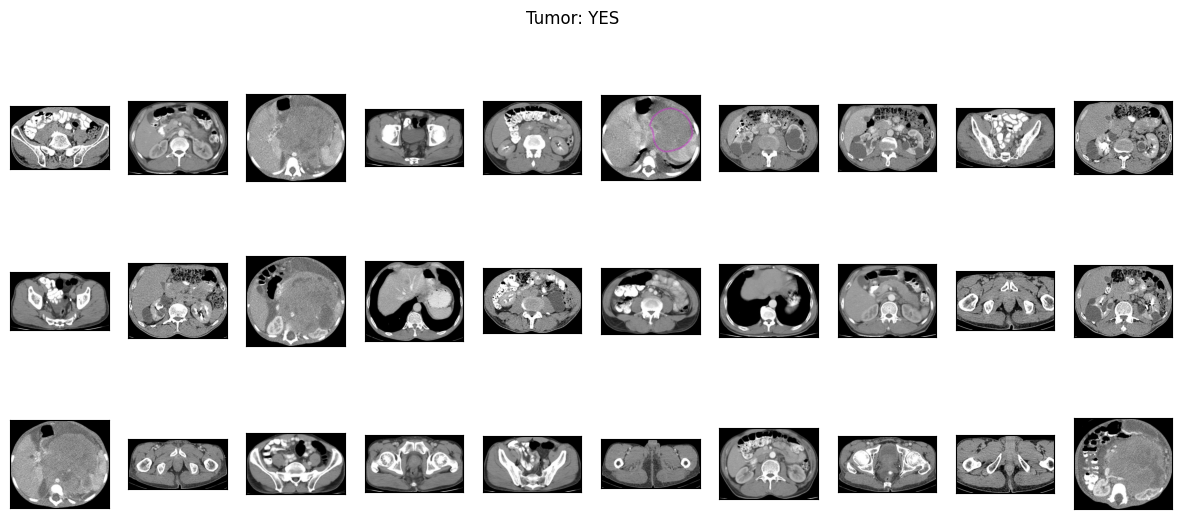

In [ ]:
plot_samples(x_val_crop, y_val, labels, 30)

### ***Now making these new directories for crop images***

In [ ]:
#!mkdir TRAIN_CROP TEST_CROP VAL_CROP TRAIN_CROP/YES TRAIN_CROP/NO TEST_CROP/YES TEST_CROP/NO VAL_CROP/YES VAL_CROP/NO

!mkdir '/content/drive/MyDrive/neuroblastoma/TRAIN_CROP/'
!mkdir '/content/drive/MyDrive/neuroblastoma/TEST_CROP/'
!mkdir '/content/drive/MyDrive/neuroblastoma/VAL_CROP/'

!mkdir '/content/drive/MyDrive/neuroblastoma/TRAIN_CROP/YES'
!mkdir '/content/drive/MyDrive/neuroblastoma/TEST_CROP/YES'
!mkdir '/content/drive/MyDrive/neuroblastoma/VAL_CROP/YES'

!mkdir '/content/drive/MyDrive/neuroblastoma/TRAIN_CROP/NO'
!mkdir '/content/drive/MyDrive/neuroblastoma/TEST_CROP/NO'
!mkdir '/content/drive/MyDrive/neuroblastoma/VAL_CROP/NO'


mkdir: cannot create directory ‘/content/drive/MyDrive/neuroblastoma/TRAIN_CROP/’: File exists
mkdir: cannot create directory ‘/content/drive/MyDrive/neuroblastoma/TEST_CROP/’: File exists
mkdir: cannot create directory ‘/content/drive/MyDrive/neuroblastoma/VAL_CROP/’: File exists
mkdir: cannot create directory ‘/content/drive/MyDrive/neuroblastoma/TRAIN_CROP/YES’: File exists
mkdir: cannot create directory ‘/content/drive/MyDrive/neuroblastoma/TEST_CROP/YES’: File exists
mkdir: cannot create directory ‘/content/drive/MyDrive/neuroblastoma/VAL_CROP/YES’: File exists
mkdir: cannot create directory ‘/content/drive/MyDrive/neuroblastoma/TRAIN_CROP/NO’: File exists
mkdir: cannot create directory ‘/content/drive/MyDrive/neuroblastoma/TEST_CROP/NO’: File exists
mkdir: cannot create directory ‘/content/drive/MyDrive/neuroblastoma/VAL_CROP/NO’: File exists


### ***Now creating function to save cropped images***

In [ ]:
def save_new_images(x_set, y_set, Foldername):
  i=0
  for (img, imclass) in zip(x_set, y_set):
    if imclass == 0:
      cv2.imwrite(Foldername +'NO/'+ str(i) + '.jpg', img)
    else:
      cv2.imwrite(Foldername +'YES/' + str(i) + '.jpg', img)
    i+=1

### ***Now using the above function these 3 sets of images are saved in the given path followed by dataset name***

In [ ]:
root_path = "/content/drive/MyDrive/neuroblastoma/"

save_new_images(x_train_crop, y_train, Foldername= root_path + 'TRAIN_CROP/')
save_new_images(x_test_crop, y_test, Foldername= root_path + 'TEST_CROP/')
save_new_images(x_val_crop, y_val, Foldername= root_path + 'VAL_CROP/')


### ***Now applying preprocessing function***

### ***This preprocessing function will resize the CT images of neuroblastoma to equal scale (100x100)***

***Inter cubic  interpolation is applied during resizing (search out for more details)***

In [ ]:
def preprocess_images(set_name, img_size):
  set_new=[]
  for img in set_name:
    img = cv2.resize(img,
                     dsize=img_size,
                     interpolation=cv2.INTER_CUBIC)
    set_new.append(preprocess_input(img))
  return np.array(set_new)

### ***Now  applying preprocessing function to each of the subset to bring all images to equal scale***

In [ ]:
print(img_size)

x_train_prep = preprocess_images(set_name = x_train_crop, img_size=img_size)
x_val_prep = preprocess_images(set_name = x_val_crop, img_size=img_size)
x_test_prep = preprocess_images(set_name = x_test_crop, img_size=img_size)

(224, 224)


### ***Plotting preprocessing images***

{0: 'NO', 1: 'YES'}


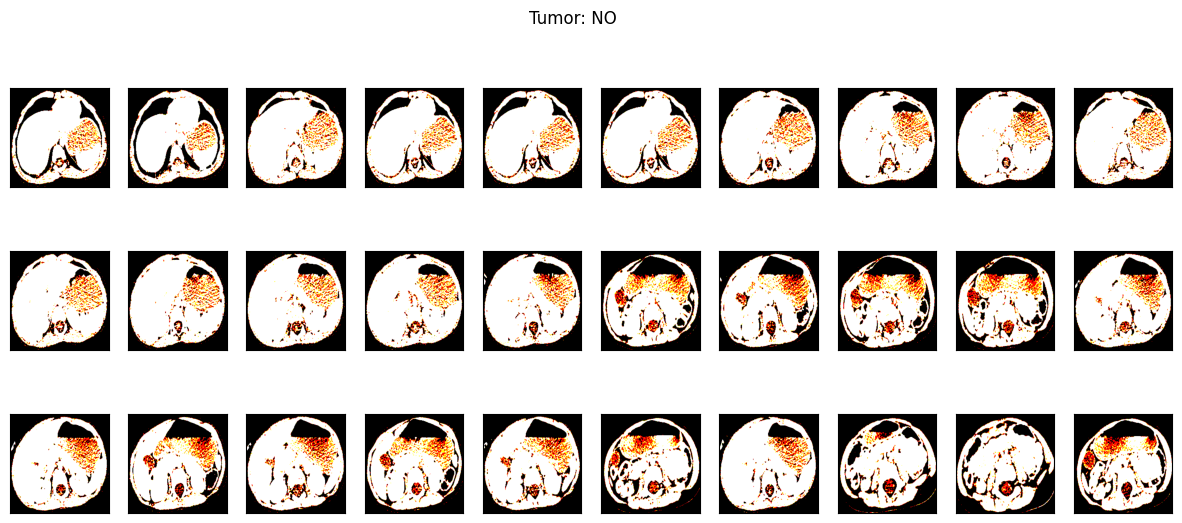

{0: 'NO', 1: 'YES'}


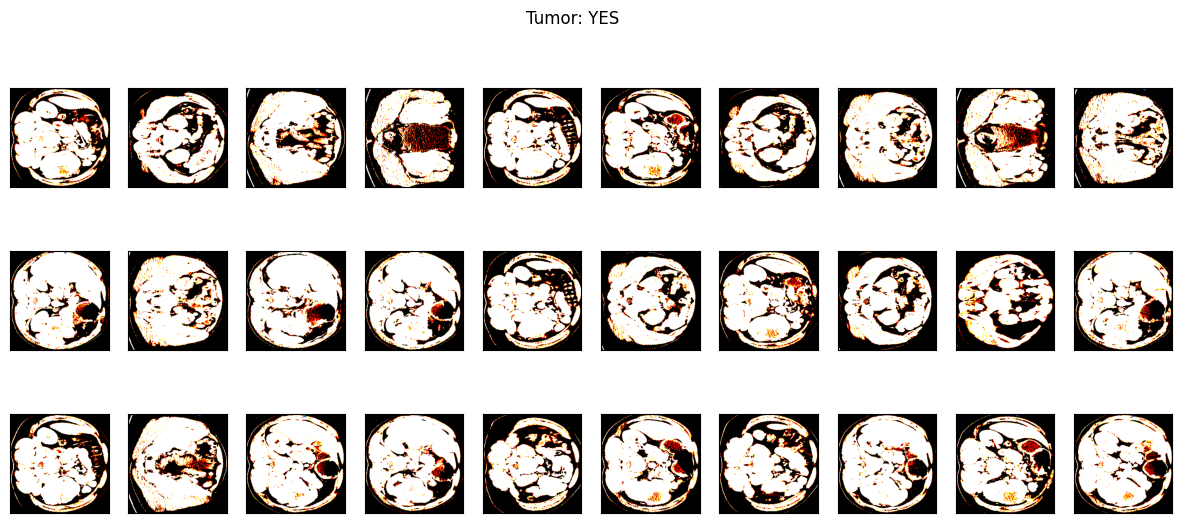

In [ ]:
plot_samples(x_train_prep, y_train, labels, 30)

### ***Images augmentation using Keras image data generator***

Performing rotation on each image about an angle of 15

---

performing vertical flip


---


peroforming horizontal flip


---

Perorming preprocessing for vgg16 model using the builtin keras vgg16 function ***Preprocess_input***

**VGG16** ***Preprocess_input*** will convert the input images from **RGB** to **BGR**, then will zero-center (***zero-centering is a common pre-processing technique that involves subtracting mean from each of the data point(image pixel) to make it zero-centered.***) each color channel with respect to the ImageNet dataset, without scaling.

In [ ]:
"""train_dir = '/content/TRAIN_CROP'
val_dir = '/content/VAL_CROP'"""

root_path = "/content/drive/MyDrive/neuroblastoma/"

img_size = (224, 224)


train_dir = root_path +'TRAIN_CROP'
val_dir = root_path + 'VAL_CROP'

train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    brightness_range=[0.5, 1.5],
    horizontal_flip = True,
    vertical_flip = True,
    preprocessing_function=preprocess_input
)

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

# defining batch size 32

train_generator = train_datagen.flow_from_directory(
    train_dir,
    color_mode='rgb',
    target_size=img_size,
    batch_size = 64,
    class_mode='categorical',
    seed=random_seed,
)

validation_generator = test_datagen.flow_from_directory(
    val_dir,
    color_mode='rgb',
    target_size=img_size,
    batch_size = 64,
    class_mode='categorical',
    seed=random_seed
)

Found 844 images belonging to 2 classes.
Found 213 images belonging to 2 classes.


(64, 224, 224, 3)


(64, 224, 224, 3)


(64, 224, 224, 3)


(64, 224, 224, 3)


(64, 224, 224, 3)


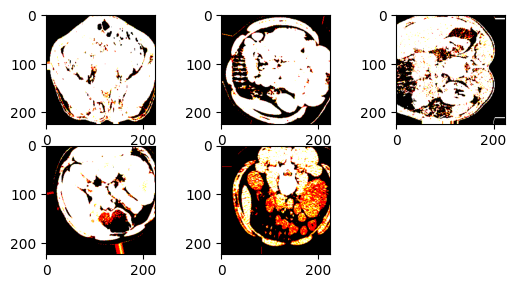

In [ ]:
for index in range(5):
    img, label = train_generator.next()
    print(img.shape)   #  (1,256,256,3)
    plt.subplot(3,3,index+1)
    plt.imshow(img[0])

plt.show()

**bold text**# ***Transfer Learning Pretrained Model VGG 16***

In [ ]:
from keras.applications import vgg16

# Defining input layer size of vgg16
img_rows, img_cols = 224, 224

# defining vgg 16
vgg = vgg16.VGG16(weights = 'imagenet',
                 include_top = False,
                 input_shape = (img_rows, img_cols, 3))

# Here we freeze the last 4 layers
# Layers are set to trainable as True by default
for layer in vgg.layers:
    layer.trainable = False

# Let's print our layers
for (i,layer) in enumerate(vgg.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

# creating function for end layers in VGG 16
def lw(bottom_model, num_classes):
  """creates the top or head of the model that will be
  placed ontop of the bottom layers"""

  top_model = bottom_model.output
  top_model = GlobalAveragePooling2D()(top_model)
  top_model = Dense(1024,activation='relu')(top_model)
  top_model = Dense(1024,activation='relu')(top_model)
  top_model = Dense(512,activation='relu')(top_model)
  top_model = Dense(num_classes,activation='softmax')(top_model)
  return top_model


# importing keras layers and model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D,Input

from keras.models import Model


num_classes = 2

FC_Head = lw(vgg, num_classes)

model = Model(inputs = vgg.input, outputs = FC_Head)

print(model.summary())

# Start Training VGG 16 using keras image datagenerator that creates batches of augmented images
from tensorflow.keras.models import Model

model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

history = model.fit_generator(train_generator,
                    epochs=50,
                    validation_data=(validation_generator),
                    verbose = 1,
                    initial_epoch=0)


# visualizing accuracy and loss
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

#plot the training and validation loss at each epoch

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

model.save("/content/drive/MyDrive/neuroblastoma/VGG16_neuroblastoma_classification.hdf5")



58889256/58889256 [==============================] - 1s 0us/step
0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0        

<ipython-input-22-a1877f4375ec>:55: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/50
14/14 [==============================] - 713s 51s/step - loss: 2.4734 - accuracy: 0.8400 - val_loss: 0.2162 - val_accuracy: 0.9296
Epoch 2/50
14/14 [==============================] - 701s 53s/step - loss: 0.1558 - accuracy: 0.9467 - val_loss: 0.1133 - val_accuracy: 0.9531
Epoch 3/50
14/14 [==============================] - 699s 50s/step - loss: 0.0356 - accuracy: 0.9893 - val_loss: 0.1244 - val_accuracy: 0.9484
Epoch 4/50
14/14 [==============================] - 702s 51s/step - loss: 0.0254 - accuracy: 0.9905 - val_loss: 0.1299 - val_accuracy: 0.9577
Epoch 5/50
14/14 [==============================] - 700s 50s/step - loss: 0.0122 - accuracy: 0.9976 - val_loss: 0.1597 - val_accuracy: 0.9577
Epoch 6/50
14/14 [==============================] - 694s 50s/step - loss: 0.0084 - accuracy: 0.9953 - val_loss: 0.0658 - val_accuracy: 0.9765
Epoch 7/50
14/14 [==============================] - 699s 50s/step - loss: 0.0401 - accuracy: 0.9834 - val_loss: 0.1643 - val_accuracy: 0.9671
Epoch 

### **Transfer Learning Pretrained Model VGG 19**

80134624/80134624 [==============================] - 0s 0us/step
0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 Conv2D False
11 MaxPooling2D False
12 Conv2D False
13 Conv2D False
14 Conv2D False
15 Conv2D False
16 MaxPooling2D False
17 Conv2D False
18 Conv2D False
19 Conv2D False
20 Conv2D False
21 MaxPooling2D False
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (

<ipython-input-22-a1b16e6f28ce>:55: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/10
14/14 [==============================] - 881s 63s/step - loss: 1.1214 - accuracy: 0.8460 - val_loss: 0.5117 - val_accuracy: 0.7230
Epoch 2/10
14/14 [==============================] - 868s 63s/step - loss: 0.1609 - accuracy: 0.9443 - val_loss: 0.0744 - val_accuracy: 0.9859
Epoch 3/10
14/14 [==============================] - 903s 65s/step - loss: 0.0656 - accuracy: 0.9775 - val_loss: 0.1001 - val_accuracy: 0.9531
Epoch 4/10
14/14 [==============================] - 895s 65s/step - loss: 0.0282 - accuracy: 0.9893 - val_loss: 0.0995 - val_accuracy: 0.9577
Epoch 5/10
14/14 [==============================] - 898s 65s/step - loss: 0.0272 - accuracy: 0.9893 - val_loss: 0.0710 - val_accuracy: 0.9718
Epoch 6/10
14/14 [==============================] - 905s 65s/step - loss: 0.0152 - accuracy: 0.9953 - val_loss: 0.0496 - val_accuracy: 0.9765
Epoch 7/10
14/14 [==============================] - 864s 62s/step - loss: 0.0190 - accuracy: 0.9929 - val_loss: 0.1378 - val_accuracy: 0.9296
Epoch 

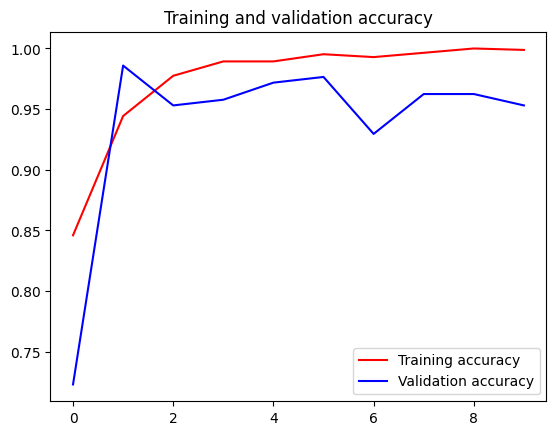

<Figure size 640x480 with 0 Axes>

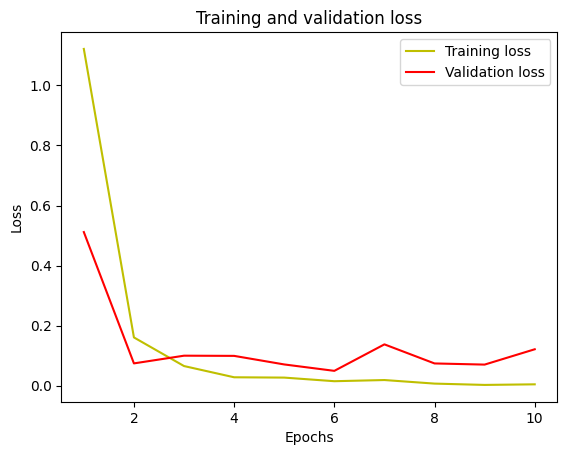

In [ ]:
from keras.applications import vgg19

# Defining input layer size of vgg19
img_rows, img_cols = 224, 224

# defining vgg 19
vgg = vgg19.VGG19(weights = 'imagenet',
                 include_top = False,
                 input_shape = (img_rows, img_cols, 3))

# Here we freeze the last 4 layers
# Layers are set to trainable as True by default
for layer in vgg.layers:
    layer.trainable = False

# Let's print our layers
for (i,layer) in enumerate(vgg.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

# creating function for end layers in VGG 16
def lw(bottom_model, num_classes):
  """creates the top or head of the model that will be
  placed ontop of the bottom layers"""

  top_model = bottom_model.output
  top_model = GlobalAveragePooling2D()(top_model)
  top_model = Dense(1024,activation='relu')(top_model)
  top_model = Dense(1024,activation='relu')(top_model)
  top_model = Dense(512,activation='relu')(top_model)
  top_model = Dense(num_classes,activation='softmax')(top_model)
  return top_model


# importing keras layers and model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D,Input

from keras.models import Model


num_classes = 2

FC_Head = lw(vgg, num_classes)

model = Model(inputs = vgg.input, outputs = FC_Head)

print(model.summary())

# Start Training VGG 19 using keras image datagenerator that creates batches of augmented images
from tensorflow.keras.models import Model

model.compile(optimizer='adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

history = model.fit_generator(train_generator,
                    epochs=10,
                    validation_data=(validation_generator),
                    verbose = 1,
                    initial_epoch=0)


# visualizing accuracy and loss
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

#plot the training and validation loss at each epoch

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

model.save("/content/drive/MyDrive/neuroblastoma/VGG19_neuroblastoma_classification.hdf5")

### **InceptionV3**


In [ ]:
from keras.applications import InceptionV3
img_rows, img_cols = 224, 224
inception = InceptionV3(weights = 'imagenet',
                        include_top = False,
                        input_shape = (img_rows, img_cols,3))
#here we freeze the last 4 layers
#layers are set to trainale as true y default
for layer in inception.layers:
  layer.trainale = False
  #lets print our layers
  for (i,layer) in enumerate(inception.layers):
    print(str(i)+" "+layer.__class__.__name__ , layer.trainable)

Streaming output truncated to the last 5000 lines.
287 Activation True
288 Activation True
289 Conv2D True
290 Conv2D True
291 Conv2D True
292 Conv2D True
293 AveragePooling2D True
294 Conv2D True
295 BatchNormalization True
296 BatchNormalization True
297 BatchNormalization True
298 BatchNormalization True
299 Conv2D True
300 BatchNormalization True
301 Activation True
302 Activation True
303 Activation True
304 Activation True
305 BatchNormalization True
306 Activation True
307 Concatenate True
308 Concatenate True
309 Activation True
310 Concatenate True
0 InputLayer True
1 Conv2D True
2 BatchNormalization True
3 Activation True
4 Conv2D True
5 BatchNormalization True
6 Activation True
7 Conv2D True
8 BatchNormalization True
9 Activation True
10 MaxPooling2D True
11 Conv2D True
12 BatchNormalization True
13 Activation True
14 Conv2D True
15 BatchNormalization True
16 Activation True
17 MaxPooling2D True
18 Conv2D True
19 BatchNormalization True
20 Activation True
21 Conv2D True
22 C

In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras import regularizers
def lw(bottom_model, num_classes):
  top_model = bottom_model.output
  top_model = GlobalAveragePooling2D()(top_model)
  top_model = Dense(1024,activation='relu')(top_model)
  top_model = Dense(512,activation='relu')(top_model)
  top_model = Dense(128,activation='relu',kernel_regularizer=regularizers.l2(0.01))(top_model)
  top_model = Dense(num_classes,activation='softmax')(top_model)
  return top_model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

from keras.models import Model


num_classes = 2

FC_Head = lw(inception, num_classes)

model = Model(inputs = inception.input, outputs = FC_Head)

print(model.summary())

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                           

In [ ]:
model.compile (optimizer='adam', loss = 'categorical_crossentropy',metrics=['accuracy'])
history = model.fit_generator(train_generator,
                    epochs=10,
                    validation_data=(validation_generator),
                    verbose = 1,
                    initial_epoch=0)

<ipython-input-26-44cd1ea216e6>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/10
14/14 [==============================] - 591s 40s/step - loss: 1.9955 - accuracy: 0.9372 - val_loss: 92.8239 - val_accuracy: 0.9296
Epoch 2/10
14/14 [==============================] - 567s 40s/step - loss: 1.3844 - accuracy: 0.9668 - val_loss: 880.7653 - val_accuracy: 0.9296
Epoch 3/10
14/14 [==============================] - 542s 39s/step - loss: 0.9580 - accuracy: 0.9905 - val_loss: 1772.3457 - val_accuracy: 0.9296
Epoch 4/10
14/14 [==============================] - 552s 39s/step - loss: 0.6595 - accuracy: 0.9917 - val_loss: 79.8947 - val_accuracy: 0.9296
Epoch 5/10
14/14 [==============================] - 546s 39s/step - loss: 0.4696 - accuracy: 0.9953 - val_loss: 1.0053 - val_accuracy: 0.9249
Epoch 6/10
14/14 [==============================] - 539s 38s/step - loss: 0.3697 - accuracy: 0.9893 - val_loss: 60.9554 - val_accuracy: 0.9296
Epoch 7/10
14/14 [==============================] - 544s 41s/step - loss: 0.2757 - accuracy: 0.9941 - val_loss: 5.4754 - val_accuracy: 0.882

In [ ]:
# visualizing accuracy and loss
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')

plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

#plot the training and validation loss at each epoch

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

model.save("/content/drive/MyDrive/neuroblastoma/inception_neuroblastoma_classification.hdf5")

# ***ResNet50***

In [ ]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2

from keras.models import Sequential

input_shape = (224, 224 ,3)

"""backbone = keras.applications.ResNet50V2(
    input_shape=(224, 224, 3),
    include_top=False
)"""

resnet_model = Sequential()

ResNet_top_layers = keras.applications.ResNet50V2(include_top=False,
                 weights= 'imagenet',
                 input_tensor=None,
                 input_shape=input_shape,
                 pooling='avg',
                 classes=2)

for layer in ResNet_top_layers.layers:
        layer.trainable=False

resnet_model.add(ResNet_top_layers)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
#resnet_model.add(Dense(1024, activation='relu', kernel_initializer='he_uniform'))
#resnet_model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))

resnet_model.add(Dense(2, activation='softmax'))
Dense(1)
print(resnet_model.summary())

### ***Compiling and training***

In [ ]:
resnet_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

resNet_history = resnet_model.fit_generator(generator=train_generator,
                    initial_epoch=0,
                    epochs=10,
                    validation_data=validation_generator,
                    verbose=1
                    )


resnet_model.save("/content/drive/MyDrive/neuroblastoma/Res50_neuroblastoma_classification.hdf5")

### ***Training History Visualization***

In [ ]:
##################################################################


#plot the training and validation IoU and loss at each epoch
loss = resNet_history.history['loss']
val_loss = resNet_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = resNet_history.history['accuracy']
val_acc = resNet_history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
def predict_image(img, model):
  # Convert to a batch of 1
  xb = to_device(img.unsqueeze(0), device)
  # Get predictions from model
  yb = model(xb)
  _, preds = torch.max(yb, dim=1)
  return train_ds.classes[preds[0].item()]

# ***CUSTOM CNN MODEL***

In [ ]:
def custom_CNN_model(IMG_HEIGHT=512,IMG_WIDTH=512,IMG_CHANNELS=3,n_classes=4):

  inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))

  input_layer = inputs


  Conv_layer_1 = Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform', padding='same')(input_layer)

  Pooling_layer_1 = MaxPooling2D(pool_size=(2,2),strides=(2,2))(Conv_layer_1)

  Conv_layer_2 = Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform', padding='same')(Pooling_layer_1)

  Pooling_layer_2 = MaxPooling2D(pool_size=(2,2),strides=(2,2))(Conv_layer_2)

  Conv_layer_3 = Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform', padding='same')(Pooling_layer_2)

  Pooling_layer_3 = MaxPooling2D(pool_size=(2,2),strides=(2,2))(Conv_layer_3)

  Conv_layer_4 = Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform', padding='same')(Pooling_layer_3)

  Pooling_layer_4 = MaxPooling2D(pool_size=(2,2),strides=(2,2))(Conv_layer_4)


  Conv_layer_5 = Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform', padding='same')(Pooling_layer_4)

  Pooling_layer_5 = MaxPooling2D(pool_size=(2,2),strides=(2,2))(Conv_layer_5)



  flatten_layer = Flatten()(Pooling_layer_5)

  dense_layer_1 = Dense(128,activation='relu',kernel_initializer='he_uniform')(flatten_layer)

  dense_layer_2 = Dense(64,activation='relu',kernel_initializer='he_uniform')(dense_layer_1)

  outputs = Dense(n_classes,activation='softmax')(dense_layer_2)

  model = Model(inputs=[inputs], outputs=[outputs])



  return model


### ***Compiling model***

In [ ]:
# Defining input layer size of vgg16
image_height, image_width = 224, 224

custom_CNN_model = custom_CNN_model(IMG_HEIGHT=image_height,IMG_WIDTH=image_width,IMG_CHANNELS=3,n_classes=num_classes)


custom_CNN_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


print(custom_CNN_model.summary())

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_94 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_95 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                             
                                                                 
 conv2d_96 (Conv2D)          (None, 56, 56, 128)       1475

### ***Training***

In [ ]:
history = custom_CNN_model.fit_generator(generator=train_generator,
                    initial_epoch=0,
                    epochs=5,
                    validation_data=validation_generator,
                    verbose=1
                    )

custom_CNN_model.save("/content/drive/MyDrive/neuroblastoma/custom_model_neuroblastoma_classification.hdf5")

<ipython-input-35-74d4e3d678ec>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = custom_CNN_model.fit_generator(generator=train_generator,


Epoch 1/5
17/17 [==============================] - 29s 1s/step - loss: 84.2532 - accuracy: 0.7977 - val_loss: 4.1083 - val_accuracy: 0.9659
Epoch 2/5
17/17 [==============================] - 24s 1s/step - loss: 4.2800 - accuracy: 0.8927 - val_loss: 1.6805 - val_accuracy: 0.9659
Epoch 3/5
17/17 [==============================] - 25s 1s/step - loss: 2.0126 - accuracy: 0.8984 - val_loss: 0.1914 - val_accuracy: 0.9659
Epoch 4/5
17/17 [==============================] - 24s 1s/step - loss: 0.3391 - accuracy: 0.9250 - val_loss: 0.1386 - val_accuracy: 0.9659
Epoch 5/5
17/17 [==============================] - 23s 1s/step - loss: 0.2351 - accuracy: 0.9421 - val_loss: 0.1365 - val_accuracy: 0.9659


### ***Training History Visualization***

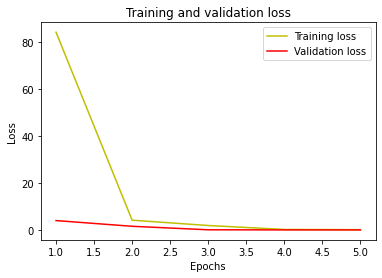

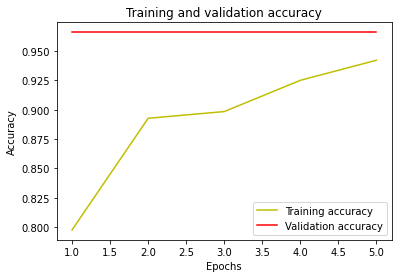

In [ ]:
##################################################################


#plot the training and validation IoU and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
#################################################

# ***Ensembling all models and creating voting classifier***

### ***Getting validation images ready***

In [ ]:
root_path = "/content/drive/MyDrive/neuroblastoma/"



test_dir = root_path + 'VAL_CROP/'

img_size = (224, 224)

# function load_data is already defined above

x_test, y_test, labels = load_data(test_dir, img_size)

img_size = (224, 224)

x_test = preprocess_images(set_name = x_test, img_size=img_size)

plot_samples(x_test, y_test, labels, 30)

### ***Sum Ensemble***

In [ ]:

from keras.models import load_model
from sklearn.metrics import accuracy_score

vgg16_model = load_model('/content/drive/MyDrive/neuroblastoma/VGG16_neuroblastoma_classification.hdf5')
vgg19_model = load_model('/content/drive/MyDrive/neuroblastoma/VGG19_neuroblastoma_classification.hdf5')
inceptionV3_model = load_model('/content/drive/MyDrive/neuroblastoma/inception_neuroblastoma_classification.hdf5')
resnet50_model = load_model('/content/drive/MyDrive/neuroblastoma/Res50_neuroblastoma_classification.hdf5')
#custom_CNN_model = load_model('/content/drive/MyDrive/neuroblastoma/custom_model_neuroblastoma_classification.hdf5')

models = [vgg16_model, vgg19_model, inceptionV3_model, resnet50_model]

preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
summed = np.sum(preds, axis=0)

# argmax across classes
ensemble_prediction = np.argmax(summed, axis=1)

prediction1 = vgg16_model.predict(x_test)
prediction1a = np.argmax(prediction1,axis=1)

prediction2 = vgg19_model.predict(x_test)
prediction2a = np.argmax(prediction2,axis=1)

prediction3 = inceptionV3_model.predict(x_test)
prediction3a = np.argmax(prediction3,axis=1)

prediction4 = resnet50_model.predict(x_test)
prediction4a = np.argmax(prediction4,axis=1)


#prediction5 = custom_CNN_model.predict(x_test)
#prediction5a = np.argmax(prediction5,axis=1)

accuracy1 = accuracy_score(y_test, prediction1a)
accuracy2 = accuracy_score(y_test, prediction2a)
accuracy3 = accuracy_score(y_test, prediction3a)
accuracy4 = accuracy_score(y_test, prediction4a)
#accuracy5 = accuracy_score(y_test, prediction5a)


ensemble_accuracy = accuracy_score(y_test, ensemble_prediction)

print()
print('Accuracy Score for VGG 16 = ', accuracy1)
print('Accuracy Score for VGG 19 = ', accuracy2)
print('Accuracy Score for InceptionV3 = ', accuracy3)
print('Accuracy Score for ResNet 50 = ', accuracy4)
#print('Accuracy Score for custom_CNN_model = ', accuracy5)
print()
print('Accuracy Score for average ensemble = ', ensemble_accuracy)

########################################

# hard voting

#model_1_vote = 0
#model_2_vote = 0
#model_3_vote = 0
#model_4_vote = 0
#model_5_vote = 0

#if accuracy1 > 0.5:

 # model_1_vote = 1

  #pass


#if accuracy2 > 0.5:

  #model_2_vote = 1

  #pass


#if accuracy3 > 0.5:

  #model_3_vote = 1

  #pass


#if accuracy4 > 0.5:

  #model_4_vote = 1

  #pass


#if accuracy5 > 0.5:

  #model_5_vote = 1

  #pass

#voting_list = [model_1_vote, model_2_vote, model_3_vote, model_4_vote, model_5_vote]

#vote_count = voting_list.count(0)

#if vote_count > 2:
  #print("ensembled Prediction = 0")
  #else
  #print("ensembled Prediction = 1")


### ***Weighted average ensemble***

In [ ]:
########################################
#Weighted average ensemble
# models = [vgg16_model, vgg19_model]

preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
#weights = [0.2, 0.2, 0.2, 0.2, 0.2]

weights = [0.99, 0.34, 0.28]

# weights=[1,0]
#Use tensordot to sum the products of all elements over specified axes.
weighted_preds = np.tensordot(preds, weights, axes=((0),(0)))
weighted_ensemble_prediction = np.argmax(weighted_preds, axis=1)

weighted_accuracy = accuracy_score(y_test, weighted_ensemble_prediction)
print()
print('Accuracy Score for VGG 16 = ', accuracy1)
print('Accuracy Score for VGG 19 = ', accuracy2)
print('Accuracy Score for InceptionV3 = ', accuracy3)
print('Accuracy Score for ResNet 50 = ', accuracy4)
#print('Accuracy Score for custom_CNN_model = ', accuracy5)
print()
print('Accuracy Score for average ensemble = ', ensemble_accuracy)
print('Accuracy Score for weighted average ensemble = ', weighted_accuracy)
########################################

7/7 [==============================] - 22s 3s/step

Accuracy Score for VGG 16 =  0.971830985915493
Accuracy Score for InceptionV3 =  0.9061032863849765
Accuracy Score for ResNet 50 =  0.7652582159624414

Accuracy Score for average ensemble =  0.9530516431924883
Accuracy Score for weighted average ensemble =  0.971830985915493


In [ ]:
labels

{0: 'NO', 1: 'YES'}

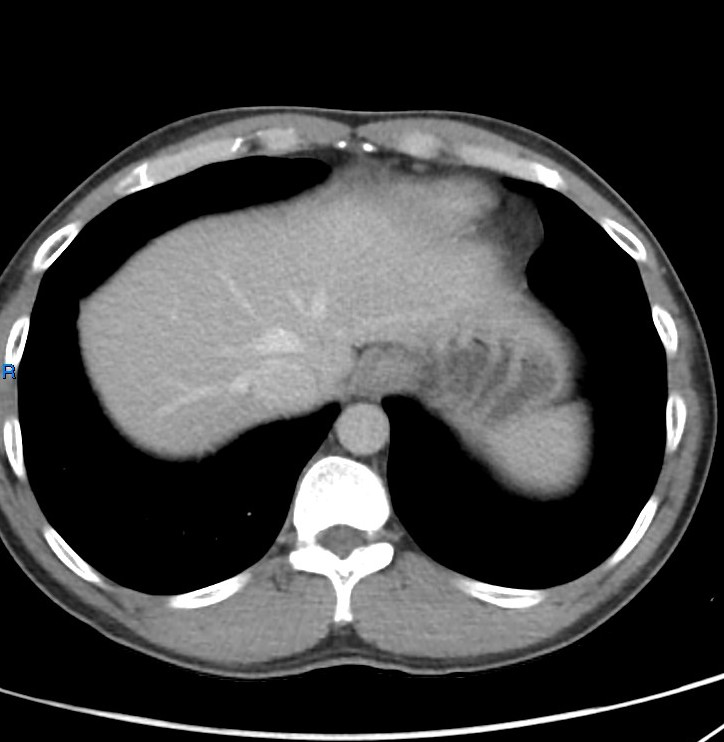

In [ ]:
file_nameee = '/content/drive/MyDrive/neuroblastoma/Neuroblastoma_Dataset/Yes/Y75.jpg'
PIL.Image.open(file_nameee)

In [ ]:
img = tf.keras.preprocessing.image.load_img(file_nameee, target_size=(224,224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
predictions =model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print(f"This image most likely belongs to {labels[np.argmax(score)]} with a {100 * np.max(score)} percent confidence.")







1/1 [==============================] - 2s 2s/step
This image most likely belongs to YES with a 73.10585379600525 percent confidence.


In [ ]:
import numpy as np
from keras.models import load_model
from keras.models import load_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


# Get predictions from each model
vgg16_V1 = vgg16_model.predict(x_test)
resnet50_V2 = resnet50_model.predict(x_test)
custom_CNN_V3 =custom_CNN_model.predict(x_test)

# Combine predictions using majority voting
y_pred_combined = np.argmax(resnet50_V2 + vgg16_V1 + custom_CNN_V3 , axis=1)

# Save combined predictions
np.save('y_pred_combined.npy', y_pred_combined)
print ()
print('Accuracy Score for vgg 16 = ', accuracy1)
print('Accuracy Score for resNet 50 = ', accuracy2)
print('Accuracy Score for custom CNN = ', accuracy3)
print('Best Model after Voting = ', y_pred_combined)


f1_vgg16 = f1_score(y_test, prediction1a)
f1_resenet50 = f1_score(y_test, prediction2a)
f1_CNN = f1_score(y_test, prediction3a)

# print the f-1 scores
print('F1-score of vgg16: {}'.format(np.round(f1_vgg16,4)))
print('F1-score of resenet50: {}'.format(np.round(f1_resenet50,4)))
print('F1-score of Custom CNN: {}'.format(np.round(f1_CNN,4)))



15/15 [==============================] - 0s 31ms/step

Accuracy Score for vgg 16 =  0.9872068230277186
Accuracy Score for resNet 50 =  0.9680170575692963
Accuracy Score for custom CNN =  0.9658848614072495
Best Model after Voting =  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 

In [ ]:
from sklearn.metrics import classification_report
from scipy.stats import mode

# create a 2D array of the individual model predictions
predictions = np.array([prediction1a, prediction3a, prediction4a])

#predictions = np.array([prediction1a, prediction2a, prediction3a, prediction4a, prediction5a])

# take the mode along axis 0 to get the most common class for each sample
ensemble_prediction = mode(predictions, axis=0).mode.flatten()

# calculate the accuracy of the ensemble prediction
ensemble_accuracy = accuracy_score(y_test, ensemble_prediction)

print('Accuracy Score for ensemble = ', ensemble_accuracy)
print('Classification report for ensemble:')
print(classification_report(y_test, ensemble_prediction))

Accuracy Score for ensemble =  0.9577464788732394
Classification report for ensemble:
              precision    recall  f1-score   support

           0       0.88      0.47      0.61        15
           1       0.96      0.99      0.98       198

    accuracy                           0.96       213
   macro avg       0.92      0.73      0.79       213
weighted avg       0.95      0.96      0.95       213



<ipython-input-46-f6a3f550260d>:10: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  ensemble_prediction = mode(predictions, axis=0).mode.flatten()


# Model Ensemble
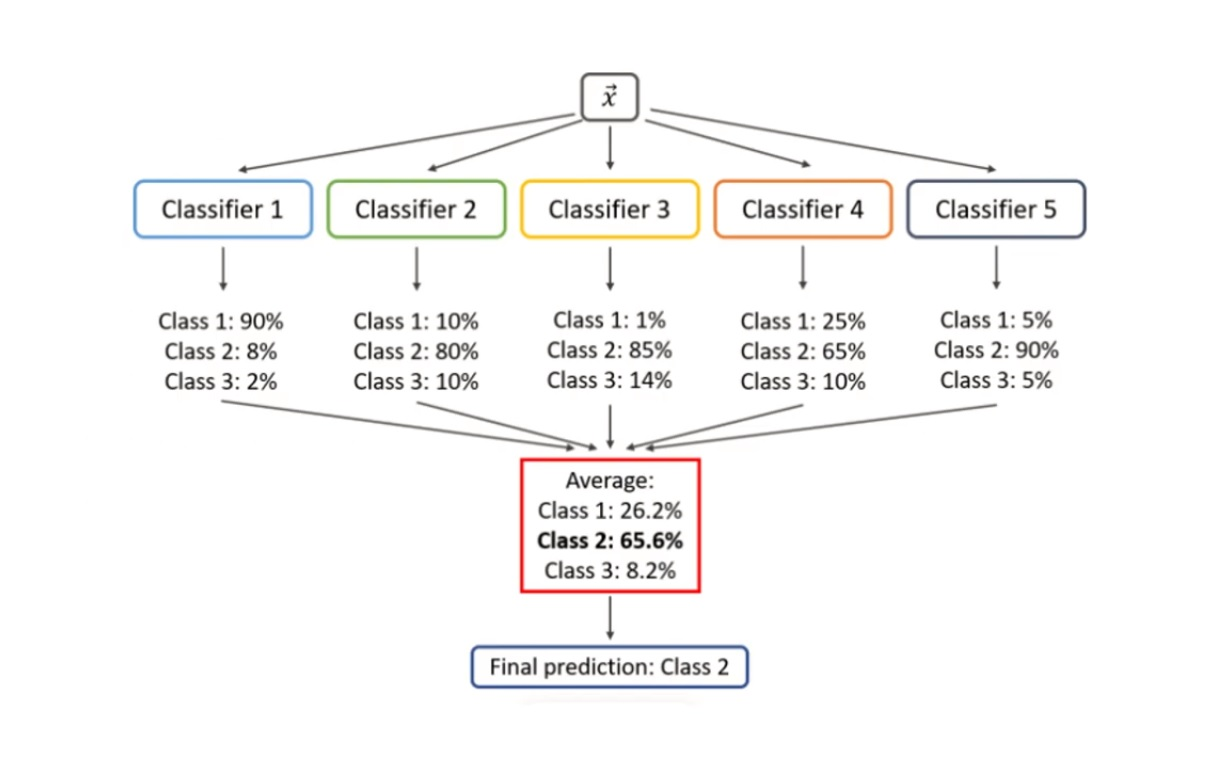

In [ ]:
from keras.models import load_model, Model
from sklearn.metrics import accuracy_score
from keras.layers import Average, Input
import tensorflow as tf

vgg16_model = load_model('/content/drive/MyDrive/neuroblastoma/VGG16_neuroblastoma_classification.hdf5')
resnet50_model = load_model('/content/drive/MyDrive/neuroblastoma/Res50_neuroblastoma_classification.hdf5')
custom_CNN_model = load_model('/content/drive/MyDrive/neuroblastoma/custom_model_neuroblastoma_classification.hdf5')


# preparing 3 models for ensembling (creating new model using the weighted average prediction score from each of the model for each class)

vgg16 = Model(inputs = vgg16_model.inputs, outputs = vgg16_model.outputs, name = 'vgg16')
resnet50 = Model(inputs = resnet50_model.inputs, outputs = resnet50_model.outputs, name = 'resnet50')
custom_CNN = Model(inputs = custom_CNN_model.inputs, outputs = custom_CNN_model.outputs, name = 'custom_CNN')


models = [vgg16,resnet50,custom_CNN]

ensemble_model_input = Input(shape = (224,224,3))

models_outputs = [model(inputs = ensemble_model_input) for model in models] # getting output from each model

ensemble_model_output = Average()(models_outputs)

ensemble_model = Model(inputs = ensemble_model_input, outputs = ensemble_model_output, name = 'ensemble_model')

# Now printing the summary of ensemble model

print(ensemble_model.summary())



Model: "ensemble_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, 2)            16815426    ['input_3[0][0]']                
                                                                                                  
 resnet50 (Functional)          (None, 2)            27238402    ['input_3[0][0]']                
                                                                                                  
 custom_CNN (Functional)        (None, 2)            2280130     ['input_3[0][0]']   

# Training Ensemble model

In [ ]:

#try any of these two loss function make sure to comment one when using another one


#ensemble_model.compile(optimizer='adam',loss=tf.losses.sparse_categorical_crossentropy(from_logits=False),metrics=['accuracy'])

ensemble_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# train_generator is configured in very initial sections
history = ensemble_model.fit_generator(generator=train_generator,
                    initial_epoch=0,
                    epochs=5,
                    validation_data=validation_generator,
                    verbose=1
                    )

ensemble_model.save("/content/drive/MyDrive/neuroblastoma/ensemble_model_neuroblastoma_classification.hdf5")

Visualization of loss accuracy graph of ensemble model

In [ ]:
##################################################################


#plot the training and validation IoU and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
#################################################

# ------------------Stop here------------------------

In [ ]:
from keras.models import load_model, Model
from keras.layers import Input, Average
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from keras.models import Sequential
import tensorflow as tf
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

import numpy as np
from keras.models import load_model
from keras.models import load_model
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(x_train, y_train, test_size=0.3)
X_labeled = X_labeled.reshape(X_labeled.shape[0], -1) / 255.0
X_unlabeled = X_unlabeled.reshape(X_unlabeled.shape[0], -1) / 255.0

models = [vgg16_model, vgg19_model, inceptionV3_model, resnet50_model, custom_CNN_model]

model1 = Model(inputs=vgg16_model.inputs, outputs=vgg16_model.outputs, name='vgg16')
model2 = Model(inputs=vgg19_model.inputs, outputs=vgg19_model.outputs, name='vgg19')
model3 = Model(inputs=inceptionV3_model.inputs, outputs=inceptionV3_model.outputs, name='inceptionV3')
model4 = Model(inputs=resnet50_model.inputs, outputs=resnet50_model.outputs, name='resnet50')
model5 = Model(inputs=custom_CNN_model.inputs, outputs=custom_CNN_model.outputs, name='custom_CNN_model')

model_test = [model1, model2, model3, model4, model5]

model_input = Input(shape=(224, 224, 3))
model_outputs = [model(model_input) for model in model_test]

ensemble_output = Average()(model_outputs)
ensemble_model = Model(inputs=model_input, outputs=ensemble_output, name='ensemble')

ensemble_model.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

history=ensemble_model.fit(
  x_test,
  validation_data=validation_generator,
  epochs=15)


Epoch 1/15


ValueError: ignored

In [ ]:
#!pip install numpy scikit-learn matplotlib opencv-python
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

import numpy as np
from keras.models import load_model
from keras.models import load_model
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(x_train, y_train, test_size=0.3)
X_labeled = X_labeled.reshape(X_labeled.shape[0], -1) / 255.0
X_unlabeled = X_unlabeled.reshape(X_unlabeled.shape[0], -1) / 255.0
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import LogisticRegression


eclf2 = VotingClassifier(estimators=[('vgg16_model', prediction1a), ('resenet50_model', prediction4a), ('custom_CNN_model', prediction5a)], voting='hard')
eclf2.fit(x_test, y_test)
predictionss = eclf2.predict(x_test)
print(classification_report(y_test, predictionss))


# aaa=prediction1a(random_state=50)
# aaa.fit(X_labeled, y_labeled)

# bbb=resnet50_model(random_state=42)
# bbb.fit(X_labeled, y_labeled)

# ccc=custom_CNN_model(random_state=42)
# ccc.fit(X_labeled, y_labeled)

#rfc = RandomForestClassifier(random_state=42)
#rfc.fit(X_labeled, y_labeled)
# train the Logistic Regression Classifier
#lr = LogisticRegression(random_state=42)
#lr.fit(X_labeled, y_labeled)


ensemble = VotingClassifier(estimators=[('aaa', aaa), ('bbb', bbb), ('ccc',ccc)], voting='hard')
ensemble.fit(X_labeled, y_labeled)
y_pred = ensemble.predict(X_unlabeled)
from sklearn.metrics import classification_report
print(classification_report(y_unlabeled, y_pred))

In [ ]:
# import the voting classifier
from sklearn.ensemble import VotingClassifier
import numpy
# import the voting regressor
from sklearn.ensemble import VotingRegressor
from sklearn.preprocessing import MinMaxScaler


# standardize the int features
mms = MinMaxScaler()
X_train = mms.fit_transform (x_train)
X_test = mms.transform (x_test)


# import libraries
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score

# making predictions with the decision tree classifier
dtc = DecisionTreeClassifier(random_state=42)
dtc = dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)


# making predictions with the logistic regression model
lr = LogisticRegression()
lr = lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


# making predictions with the naive bayes model
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)


# evaluating the models based on their f-1 scores
f1_dtc = f1_score(y_test, y_pred_dtc)
f1_lr = f1_score(y_test, y_pred_lr)
f1_gnb = f1_score(y_test, y_pred_gnb)

# print the f-1 scores
print('F1-score of decision tree classifier: {}'.format(np.round(f1_dtc,4)))
print('F1-score of support vector machine: {}'.format(np.round(f1_lr,4)))
print('F1-score of naive bayes classifier: {}'.format(np.round(f1_gnb,4)))


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
from keras.models import load_model
from keras.models import load_model
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from keras.models import load_model
from sklearn.metrics import accuracy_score

vgg16_model = load_model('/content/drive/MyDrive/neuroblastoma/VGG16_neuroblastoma_classification.hdf5')
#resnet50_model = load_model('/content/drive/MyDrive/neuroblastoma/Res50_neuroblastoma_classification.hdf5')
#custom_CNN_model = load_model('/content/drive/MyDrive/neuroblastoma/custom_model_neuroblastoma_classification.hdf5')


#X_train,X_test,Y_train,Y_test= train_test_split(x_train, y_train, test_size=0.2, random_state=10)
X_labeled = X_labeled.reshape(X_labeled.shape[0], -1) / 255.0
X_unlabeled = X_unlabeled.reshape(X_unlabeled.shape[0], -1) / 255.0
 #making predictions with the decision tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred_dtc = dtc.predict(x_test)
print(dtc.score(x_test,y_test))

##vgg_clf=vgg16_model(kernel="rbf", probability=True)
#vgg_clf.fit(X_train,y_train)
#print(vgg_clf.score(X_test,y_test))










In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification

# Define the individual classifiers
def create_model_1():
    model = tf.keras.Sequential([
        Dense(64, activation='relu', input_shape=(20,)),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def create_model_2():
    model = tf.keras.Sequential([
        Dense(128, activation='relu', input_shape=(20,)),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def create_model_3():
    model = tf.keras.Sequential([
        Dense(32, activation='relu', input_shape=(20,)),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create instances of the KerasClassifier wrapper for each model
model_1 = KerasClassifier(build_fn=create_model_1, epochs=10, batch_size=32, verbose=0)
model_2 = KerasClassifier(build_fn=create_model_2, epochs=10, batch_size=32, verbose=0)
model_3 = KerasClassifier(build_fn=create_model_3, epochs=10, batch_size=32, verbose=0)

# Create the voting classifier
estimators = [('model_1', model_1), ('model_2', model_2), ('model_3', model_3)]
voting_clf = VotingClassifier(estimators=estimators, voting='hard')

# Generate some sample data for demonstration purposes
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Evaluate the voting classifier using cross-validation
scores = cross_val_score(voting_clf, X, y, cv=5)
print('Accuracy: %.3f (%.3f)' % (scores.mean(), scores.std()))